In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#import data
level1df = pd.read_csv('Data/level1Data.csv')
level2df = pd.read_csv('Data/level2Data.csv')
level3df = pd.read_csv('Data/level3Data.csv')
level4df = pd.read_csv('Data/level4Data.csv')
level5df = pd.read_csv('Data/level5Data.csv')

classes = ['Unspoofed','Spoofed']

In [3]:
#need int for classification problem, discrete not continuous
level1df['isSpoofed'] = level1df['isSpoofed'].astype(int)
level2df['isSpoofed'] = level2df['isSpoofed'].astype(int)
level3df['isSpoofed'] = level3df['isSpoofed'].astype(int)
level4df['isSpoofed'] = level4df['isSpoofed'].astype(int)
level5df['isSpoofed'] = level5df['isSpoofed'].astype(int)

combineddf = level1df.append(level2df)
combineddf = combineddf.append(level3df)
combineddf = combineddf.append(level4df)
combineddf = combineddf.append(level5df)

lolv1 = level2df.append(level3df)
lolv1 = lolv1.append(level4df)
lolv1 = lolv1.append(level5df)

lolv2 = level1df.append(level3df)
lolv2 = lolv2.append(level4df)
lolv2 = lolv2.append(level5df)

lolv3 = level1df.append(level2df)
lolv3 = lolv3.append(level4df)
lolv3 = lolv3.append(level5df)

lolv4 = level1df.append(level2df)
lolv4 = lolv4.append(level3df)
lolv4 = lolv4.append(level5df)

lolv5 = level1df.append(level2df)
lolv5 = lolv5.append(level3df)
lolv5 = lolv5.append(level4df)

In [4]:
def splitData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [5]:
def getXY(df):
    X = df.drop(['isSpoofed'], axis=1)
    y = df['isSpoofed']
    return X, y

In [6]:
def fitAndPredict(X_train, X_test, y_train, y_test):
    #log w/ Cross Val
    LogCV = LogisticRegressionCV(max_iter=1000)
    LogCV.fit(X_train,y_train)
    LogCVPred = LogCV.predict(X_test)
    Logprc,Logrcl, Logfs, support = precision_recall_fscore_support(y_test,LogCVPred)
    LogCVResults = {'Precision' : Logprc, 'Recall':Logrcl, 'FScore':Logfs}
    
    LogPlot = ClassificationReport(LogCV,classes=classes)
    #LogPlot.fit(X_train,y_train)
    LogPlot.score(X_test,y_test)
    LogPlot.show()
    
    #gaussian bayes
    GNB = GaussianNB()
    GNB.fit(X_train,y_train)
    GNBPred = GNB.predict(X_test)
    GNBprc,GNBrcl, GNBfs, support = precision_recall_fscore_support(y_test,GNBPred)
    GNBResults = {'Precision' : GNBprc, 'Recall':GNBrcl, 'FScore':GNBfs}
    
    GNBPlot = ClassificationReport(GNB,classes=classes)
    #GNBPlot.fit(X_train,y_train)
    GNBPlot.score(X_test,y_test)
    GNBPlot.show()
    
    
    #random forest
    RFC = RandomForestClassifier()
    RFC.fit(X_train,y_train)
    RFCPred = RFC.predict(X_test)
    RFCprc,RFCrcl, RFCfs, support = precision_recall_fscore_support(y_test, RFCPred)
    RFCResults = {'Precision' : RFCprc, 'Recall':RFCrcl, 'FScore':RFCfs}
    
    RFCPlot = ClassificationReport(RFC,classes=classes)
    #RFCPlot.fit(X_train,y_train)
    RFCPlot.score(X_test,y_test)
    RFCPlot.show()
    

    
    
    return LogCVResults, GNBResults, RFCResults

In [7]:
def fitPredictPlot(X_train,X_test,y_train,y_test):
    
    LogPlot = ClassificationReport(LogisticRegressionCV(max_iter=1000),classes=classes)
    LogPlot.fit(X_train,y_train)
    LogPlot.score(X_test,y_test)
    LogPlot.show()
    
    GNBPlot = ClassificationReport(GaussianNB(),classes=classes)
    GNBPlot.fit(X_train,y_train)
    GNBPlot.score(X_test,y_test)
    GNBPlot.show()
    
    
    RFCPlot = ClassificationReport(RandomForestClassifier(),classes=classes)
    RFCPlot.fit(X_train,y_train)
    RFCPlot.score(X_test,y_test)
    RFCPlot.show()
    

In [8]:
def runTest(df, level):
    X, y = getXY(df)
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    #numTests = 3
    
    X_train, X_test, y_train, y_test = splitData(X, y)
    print('LEVEL: ' + level)
    
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    results = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    return results

In [9]:
def runTestO():
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    ro1=ro2=ro3=ro4=ro5 = {}
    #numTests = 3

    X_train, y_train = getXY(lolv1)
    X_test, y_test = getXY(level1df) 
    print('UNSEEN LEVEL: ONE')
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    ro1 = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    X_train, y_train = getXY(lolv2)
    X_test, y_test = getXY(level2df)
    print('UNSEEN LEVEL: TWO')
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    ro2 = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    X_train, y_train = getXY(lolv3)
    X_test, y_test = getXY(level3df)
    print('UNSEEN LEVEL: THREE')
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    ro3 = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    X_train, y_train = getXY(lolv4)
    X_test, y_test = getXY(level4df)
    print('UNSEEN LEVEL: FOUR')
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    ro4 = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    logPRC= gnbPRC= rfcPRC = 0
    logRCL= gnbRCL= rfcRCL = 0
    logFS= gnbFS= rfcFS = 0
    X_train, y_train = getXY(lolv5)
    X_test, y_test = getXY(level5df)
    print('UNSEEN LEVEL: FIVE')
    log, gnb, rfc = fitAndPredict(X_train,X_test,y_train,y_test)
    ro5 = {'LCV' : (logPRC, logRCL, logFS),'GNB':(gnbPRC,gnbRCL,gnbFS), 'RFC': (rfcPRC,rfcRCL,rfcFS)}
    #fitPredictPlot(X_train,X_test,y_train,y_test)
    
    return ro1,ro2,ro3,ro4,ro5
    

LEVEL: ONE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


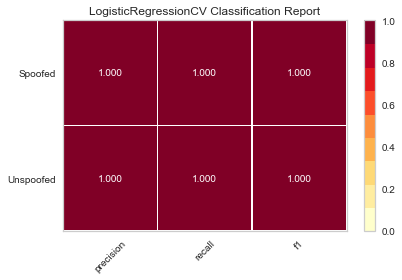

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


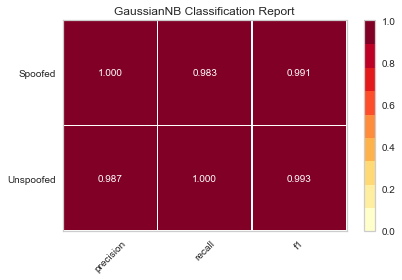

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


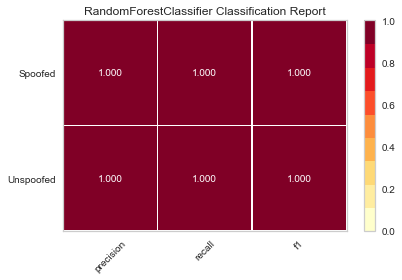

LEVEL: TWO


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


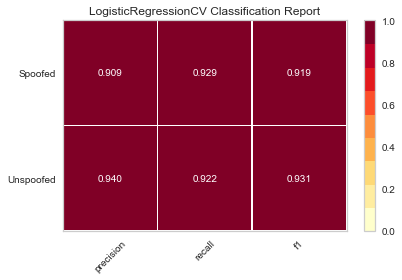

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


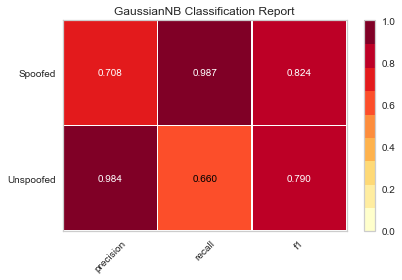

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


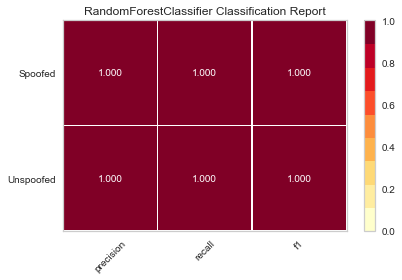

LEVEL: THREE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


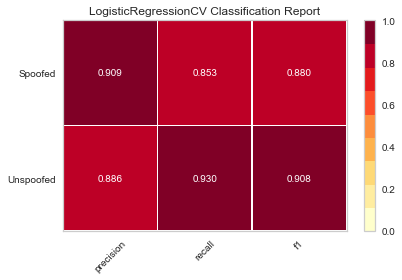

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


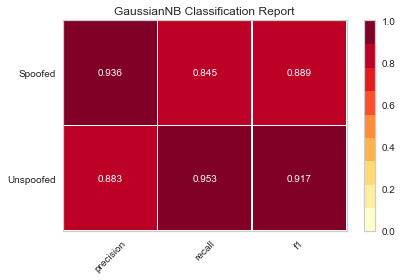

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


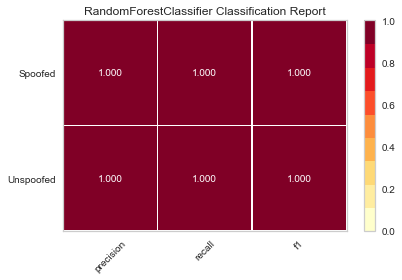

LEVEL: FOUR


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


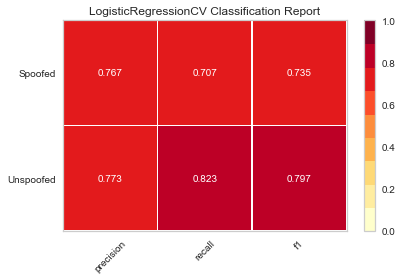

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


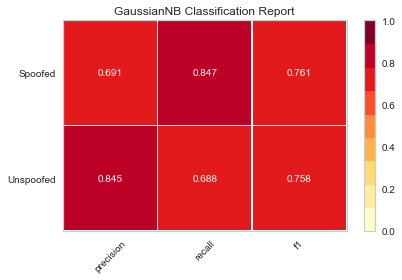

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


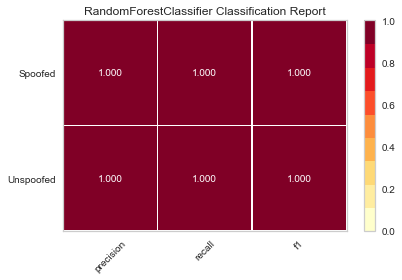

LEVEL: FIVE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


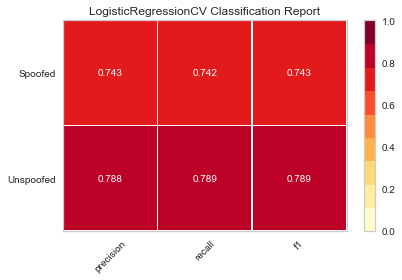

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


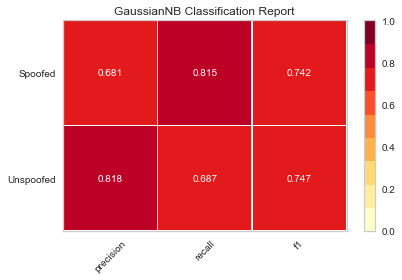

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


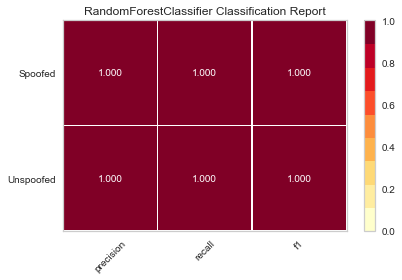

LEVEL: COMBINED


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


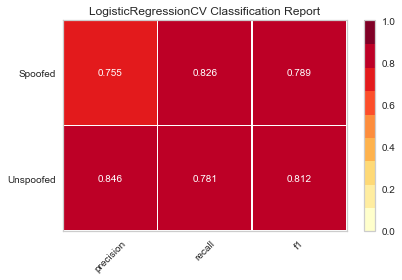

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


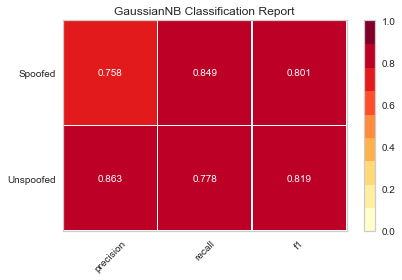

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


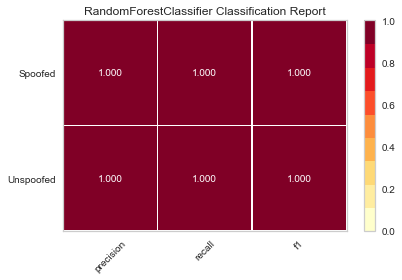

UNSEEN LEVEL: ONE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


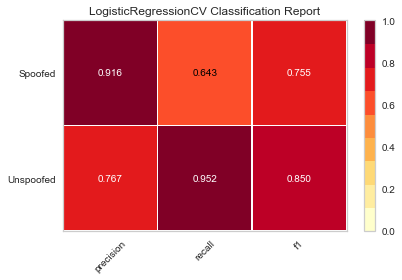

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


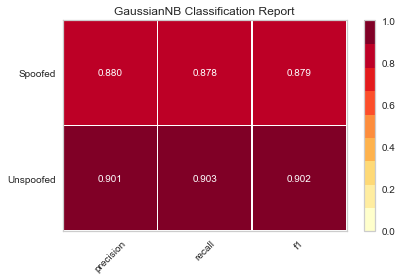

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


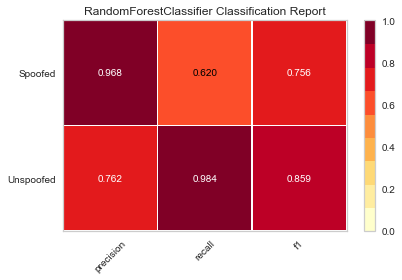

UNSEEN LEVEL: TWO


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


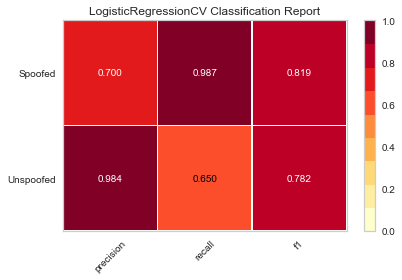

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


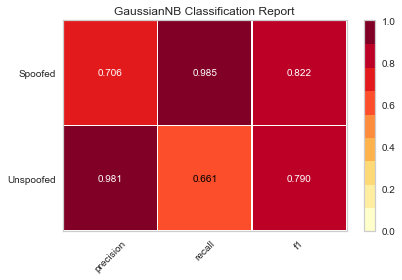

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


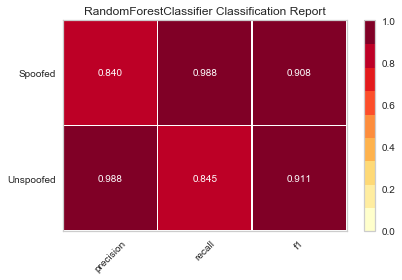

UNSEEN LEVEL: THREE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


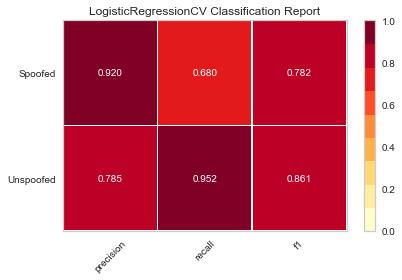

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


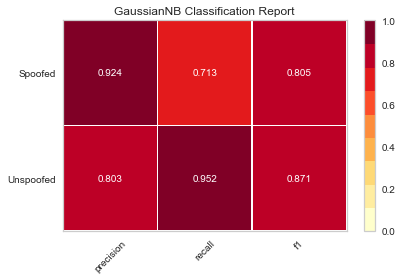

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


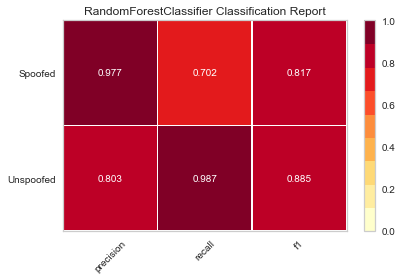

UNSEEN LEVEL: FOUR


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


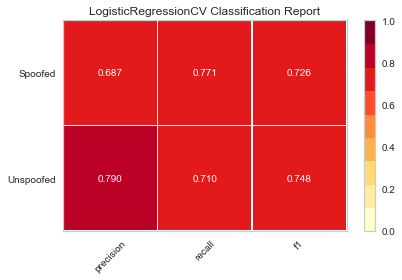

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


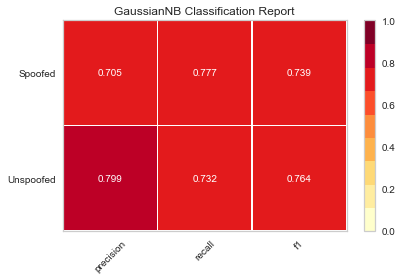

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


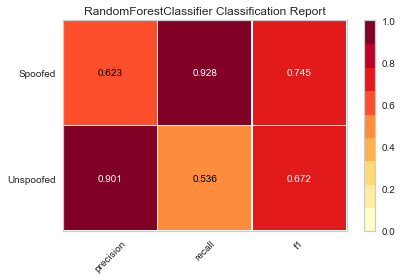

UNSEEN LEVEL: FIVE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


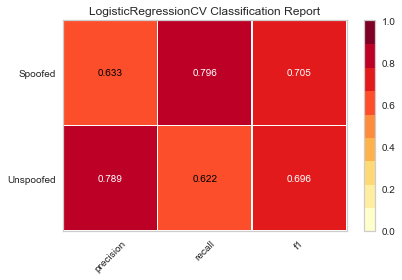

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


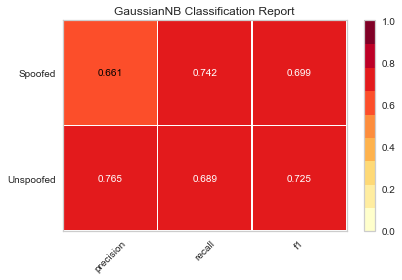

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


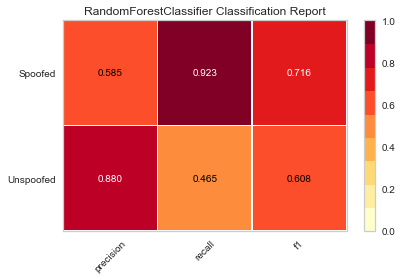

In [10]:
#if i wanna do stuff with the numbers
r1= runTest(level1df,'ONE')
#print(r1)
r2=runTest(level2df, 'TWO')
#print(r2)
r3=runTest(level3df, 'THREE')
#print(r3)
r4=runTest(level4df, 'FOUR')
#print(r4)
r5=runTest(level5df, 'FIVE')
#print(r5)
rc=runTest(combineddf, 'COMBINED')
#print(rc)

ro1,ro2,ro3,ro4,ro5=runTestO()
#print(ro1)
#print(ro2)
#print(ro3)
#print(ro4)
#print(ro5)
